# Benchmarcks and plots of SVM RL step envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [14]:
## All the data stored in the hdf5 file
f = h5py.File('runs_step_envs/run_9.hdf5', 'r')

list(f.keys())

['actor_models',
 'critic_models',
 'energies',
 'hyperparams',
 'info',
 'princip_dims',
 'rewards',
 'sigmas']

In [15]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v0
add_noise_every  :  1
batch_size  :  1
bootstrap_size  :  5
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [16]:
## Example of data stored and number of episodes
# print(list(f['rewards'].keys()))

print('The number of episodes is then:', len(f['rewards'].keys()))

The number of episodes is then: 600


The max score is at episode 131 and is equal to 216520.75
The min score is at episode 76 and is equal to -1672.361083984375


Text(0.5, 0, 'Episode #')

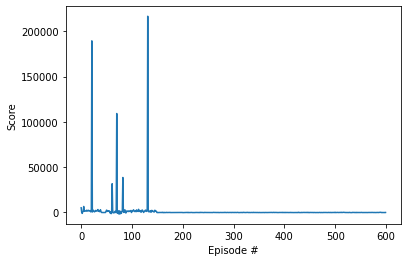

In [17]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
for i in range(len(f['rewards'].keys())):
    scores[i] = np.sum(f['rewards'][f'rew_ep_{i}'][:])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  216520.75


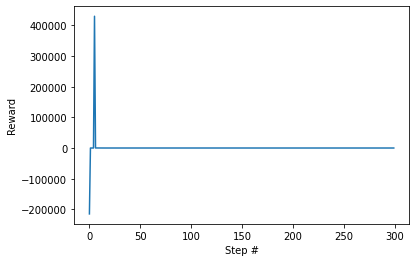

In [18]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

The last energy reached is =  -0.047958


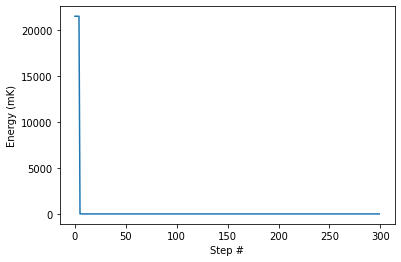

In [19]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

The last princip dim reached is =  93


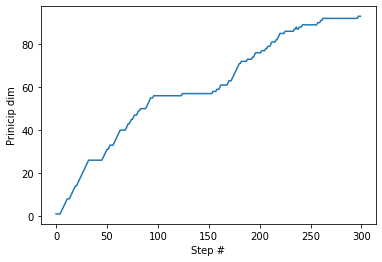

In [20]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

(array([ 2.,  6.,  3.,  6., 13., 14., 13., 23., 39.,  9.]),
 array([12995.636, 14316.666, 15637.695, 16958.727, 18279.756, 19600.785,
        20921.816, 22242.846, 23563.875, 24884.906, 26205.936],
       dtype=float32),
 <BarContainer object of 10 artists>)

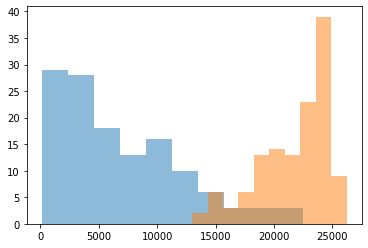

In [21]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_max}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  -1672.3611


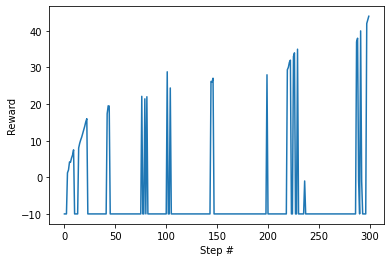

In [22]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

The last energy reached is =  -0.148607


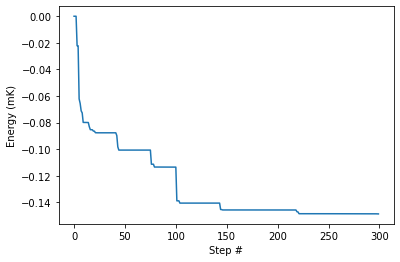

In [23]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

The last princip dim reached is =  44


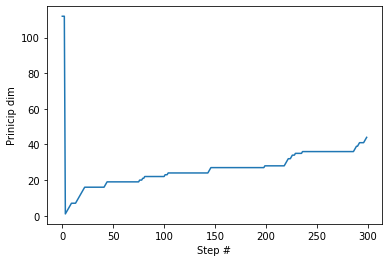

In [24]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])

(array([ 5.,  5.,  2.,  7., 14.,  4.,  3.,  2.,  0.,  2.]),
 array([ 7221.4697,  8349.881 ,  9478.293 , 10606.705 , 11735.116 ,
        12863.527 , 13991.939 , 15120.352 , 16248.763 , 17377.174 ,
        18505.586 ], dtype=float32),
 <BarContainer object of 10 artists>)

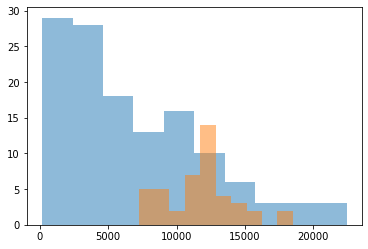

In [25]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_min}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)